In [20]:
import pandas as pd

df = pd.read_csv("jobs.csv", delimiter=",", encoding='utf-8')

df['jobDetails']

0        Our offerCapgemini Engineering is constantl...
1        Na Deloitte, oferecemos uma experiência pro...
2        About Us At Bose, better sound is just the ...
3        HEY THERE!We are Mercedes-Benz.io. Our miss...
4        About Us Job Description At Bose, better so...
                            ...                        
95       Who We AreRealPage is changing the technolo...
96       Your NEX T step is right here! Procuramos q...
97       Our client is a leading company on its sect...
98               OferecemosFormação em Hadoop;Possib...
99               We believe that we are better toget...
Name: jobDetails, Length: 100, dtype: object

In [21]:
import nltk
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud
  

job_words = ''

job = df['jobDetails']


for val in job:
    text = val.lower()
    for words in text:
        job_words = job_words + words

job_words


'   our offercapgemini engineering is constantly growing and attentive to market opportunities and in search of the best professionals to join its team. we are looking for an data engineer senior to join a challenging project in one of our large clients and market leader in its segment. if you are looking for a new challenge and with great prospects for growth in your career, come join us.your profiledegree in telecommunications, computer science or equivalent major;more 5 years experienceexperience with cloudera impala; experience with sql ; experience with postgresql;experience with airflow;experience with hive;good data modelling skills;we value previous experience in agile; we value experience with kubernetes (but in azure); we value experience in cloud environment ; capacity to structure and interpret complex information ; excellent communication skills and teamwork ; fluency in english.what you can expect - there is no top-down hierarchy. we trust in your self-organization;- coll

In [22]:
# Transformar para letras minúscula
texto_min = ''
texto_char = ''
texto_min = job_words.lower()


# Remover caracteres diferentes de letras
import re
texto_char = re.sub(
    r'[^a-zàáãâéêíóôõú\s]', '', texto_min
  )


#Tokenizar: separar por espaços
tokens = texto_char.split()
tokens

['our',
 'offercapgemini',
 'engineering',
 'is',
 'constantly',
 'growing',
 'and',
 'attentive',
 'to',
 'market',
 'opportunities',
 'and',
 'in',
 'search',
 'of',
 'the',
 'best',
 'professionals',
 'to',
 'join',
 'its',
 'team',
 'we',
 'are',
 'looking',
 'for',
 'an',
 'data',
 'engineer',
 'senior',
 'to',
 'join',
 'a',
 'challenging',
 'project',
 'in',
 'one',
 'of',
 'our',
 'large',
 'clients',
 'and',
 'market',
 'leader',
 'in',
 'its',
 'segment',
 'if',
 'you',
 'are',
 'looking',
 'for',
 'a',
 'new',
 'challenge',
 'and',
 'with',
 'great',
 'prospects',
 'for',
 'growth',
 'in',
 'your',
 'career',
 'come',
 'join',
 'usyour',
 'profiledegree',
 'in',
 'telecommunications',
 'computer',
 'science',
 'or',
 'equivalent',
 'majormore',
 'years',
 'experienceexperience',
 'with',
 'cloudera',
 'impala',
 'experience',
 'with',
 'sql',
 'experience',
 'with',
 'postgresqlexperience',
 'with',
 'airflowexperience',
 'with',
 'hivegood',
 'data',
 'modelling',
 'skillsw

In [23]:
# Lista de stopwords no nltk { vertical-output: true }
import nltk
# baixar lista de stopwords
nltk.download('stopwords')
# lista de stopwords
stopwordsEN = nltk.corpus.stopwords.words(
    'english'
)

stopwordsPT = nltk.corpus.stopwords.words(
   'portuguese'
)

chamadaLinkedin = ['exibir', 'menos', 'mais', 'experience', 'work', 'skills', 'engineer', 'people', 'looking', 'working']

#Remover stopwords da lista de tokens
tokens_stop = [t for t in tokens if t not in stopwordsEN]
tokens_stop = [t for t in tokens_stop if t not in stopwordsPT]
tokens_stop = [t for t in tokens_stop if t not in chamadaLinkedin]

tokens_stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['offercapgemini',
 'engineering',
 'constantly',
 'growing',
 'attentive',
 'market',
 'opportunities',
 'search',
 'best',
 'professionals',
 'join',
 'team',
 'data',
 'senior',
 'join',
 'challenging',
 'project',
 'one',
 'large',
 'clients',
 'market',
 'leader',
 'segment',
 'new',
 'challenge',
 'great',
 'prospects',
 'growth',
 'career',
 'come',
 'join',
 'usyour',
 'profiledegree',
 'telecommunications',
 'computer',
 'science',
 'equivalent',
 'majormore',
 'years',
 'experienceexperience',
 'cloudera',
 'impala',
 'sql',
 'postgresqlexperience',
 'airflowexperience',
 'hivegood',
 'data',
 'modelling',
 'skillswe',
 'value',
 'previous',
 'agile',
 'value',
 'kubernetes',
 'azure',
 'value',
 'cloud',
 'environment',
 'capacity',
 'structure',
 'interpret',
 'complex',
 'information',
 'excellent',
 'communication',
 'teamwork',
 'fluency',
 'englishwhat',
 'expect',
 'topdown',
 'hierarchy',
 'trust',
 'selforganization',
 'colleagues',
 'smart',
 'hardworking',
 'driven

In [24]:
job_words=''
for words in tokens_stop:
    job_words = job_words + ' ' + words

job_words

' offercapgemini engineering constantly growing attentive market opportunities search best professionals join team data senior join challenging project one large clients market leader segment new challenge great prospects growth career come join usyour profiledegree telecommunications computer science equivalent majormore years experienceexperience cloudera impala sql postgresqlexperience airflowexperience hivegood data modelling skillswe value previous agile value kubernetes azure value cloud environment capacity structure interpret complex information excellent communication teamwork fluency englishwhat expect topdown hierarchy trust selforganization colleagues smart hardworking driven amazing openminded informal culture backup giant company like capgemini engineering health insurance family life insurance proactive selfdevelopment international trainings conferences language training courses flexible hours regular team events motivated talented international team much cool stuff wou

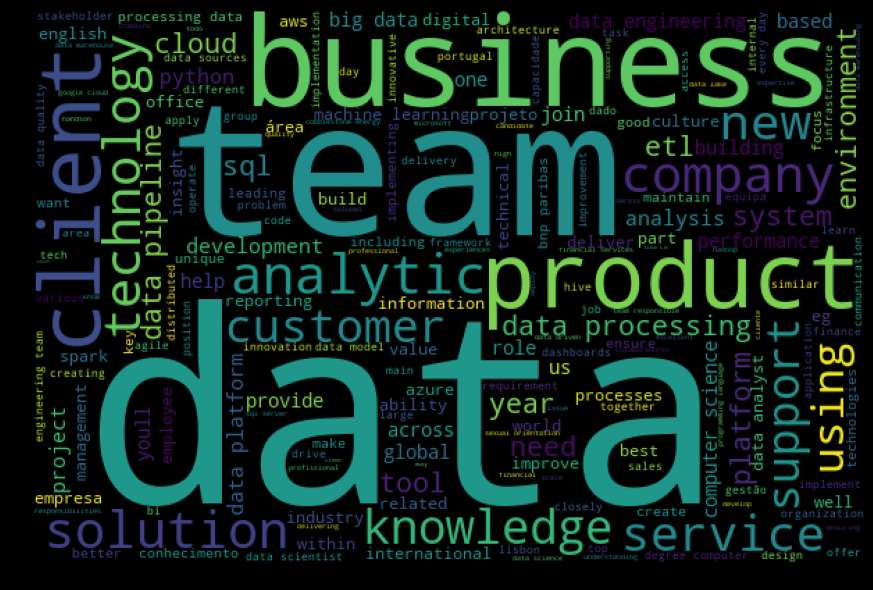

In [25]:
# Generate a word cloud image
job_wordcloud = WordCloud(width=600, height=400).generate(job_words)


#Word cloud
plt.figure( figsize=(12,8), facecolor='k')
plt.imshow(job_wordcloud)
plt.axis("on")
plt.tight_layout(pad=0)
plt.show()

In [26]:
from collections import Counter

def splitCountList(listDF, quantityValues):
  splittedWordsList = listDF.split()
  countWordsOccurrences = Counter(splittedWordsList)
  mostOccurMessages = countWordsOccurrences.most_common(quantityValues)
  df = pd.DataFrame(mostOccurMessages) 
  return df

dfWords = splitCountList(job_words, 300)
print(dfWords.to_string())

#skills, engineer, people, looking, working

                  0    1
0              data  997
1              team  187
2          business  164
3       engineering   95
4         knowledge   87
5             tools   86
6               sql   80
7       development   80
8          platform   80
9               new   79
10            cloud   79
11        analytics   79
12       technology   79
13         building   75
14          company   73
15         services   71
16            years   70
17        solutions   69
18       processing   68
19           python   67
20             part   64
21      environment   63
22           global   61
23             role   60
24          support   60
25            teams   59
26              big   57
27               us   57
28              one   56
29       management   56
30            using   56
31            large   55
32              etl   55
33          clients   54
34     technologies   54
35          systems   53
36             help   53
37          product   53
38             best   52


In [29]:
sub =['azure', 'aws', 'gcp', 'google', 'cloud']

dfTechnologies=pd.DataFrame() 

for words in sub:
    dfTechnologies = dfTechnologies.append(dfWords[dfWords[0].str.contains(words)])
 
dfTechnologies


,0,1
71,azure,36
52,aws,46
266,google,16
10,cloud,79
